/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


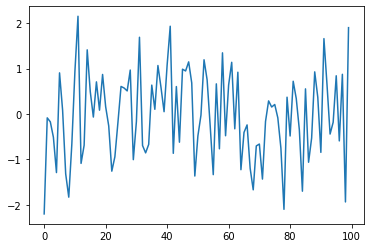

In [142]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
    

In [1]:
randrange(1, self.size)

NameError: name 'randrange' is not defined

In [4]:
from random import randrange

print(randrange(1, 5))

2


In [153]:
from collections import defaultdict
from random import randrange
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
import re

class Graph:
    '''
    Graph class that accpets file path as an argument
    '''
    
    def __init__(self, path):
#         # Dictionary of pointers of all vertices in th graph
#         self._graph_object = {}
        # Dictionary of all vertices name
        self._graph = {}
        self._coordinates = self.read_tsp_file(path)
        self._cities = [*self._coordinates.keys()]
        self._size = len(self._cities)
        self._distances = self.compute_distances()
        

    def read_tsp_file(self, path):
        """"
        Read TSP file
        """
        city_list = []

        with open(path, 'r') as f:
            _data = re.findall(r'\n([0-9].*)', f.read())

        # Split each line by space and convert to float
        for line in _data:
            city_list.append(tuple(map(float, line.split())))
        return { int(vertex): (x,y) for vertex, x, y in city_list }
    
    def euclidean_distance(self, cityA, cityB):
        """
        Formula to calculate the Euclidean distance 
        """
        # Math library
        import math
        
        x1 = self._coordinates[cityA][0]
        y1 = self._coordinates[cityA][1]
        x2 = self._coordinates[cityB][0]
        y2 = self._coordinates[cityB][1]
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
        # add node k between node i and node j
    def add(self, i, j, k):
        print(f'I: {i} - {self._distances[i][k]} K {k} - {self._distances[k][j]}  J {j} - {self._distances[i][j]}')
        print(round(self._distances[i][k] + self._distances[k][j] - self._distances[i][j], 2))
        return round(self._distances[i][k] + self._distances[k][j] - self._distances[i][j], 2)

    
    def compute_distances(self):
        self.distances = defaultdict(dict)
        for cityA in self._cities:
            for cityB in self._cities:
                if cityA != cityB and cityB not in self.distances[cityA]:
#                 if cityB not in self.distances[cityA]:
                    distance = self.euclidean_distance(cityA, cityB)
                    self.distances[cityA][cityB] = round(distance, 2)
                    self.distances[cityB][cityA] = round(distance, 2)
        return self.distances
    
    
    def closest_neighbor(self, tour, node, in_tour=False):
        neighbors = self._distances[node]
#         print(neighbors.items())
        current_dist = [(c, d) for c, d in neighbors.items()
                        if (c in tour if in_tour else c not in tour)]
        return sorted(current_dist, key=itemgetter(1))[-0]
#         return sorted(current_dist, key=itemgetter(1))[-farthest]

    def format_solution(self, solution):
        return [self._coordinates[city] for city in solution]
    
    
    def nearest_insertion(self):
        # Choose ramdom city
#         city = randrange(1, self._size)
        city = 5
        print(f'Random city: {city}')
        tour, tours = [city], []
        print(f'Tour: {tour}\nTours: {tours}')
        # Find the closest node to the first random node which is not in the tour yet
        neighbor, distance = self.closest_neighbor(tour, city, False)
        print(f'Closest Neighbor: {neighbor}\nDistance: {distance}')
        tour.append(neighbor)
        tour_length = distance
        print(f'Tour: {tour}\nTours length: {tour_length}')
        count = 0
        while len(tour) != len(self._cities):
            best, dist = None, float('inf')
#             print(f'Best: {best}\nDist: {dist}')
            
            # (selection step) given a sub-tour,we find node r not in the
            # sub-tour closest to any node j in the sub-tour,
            # i.e. with minimal c_rj
            for candidate in self._cities:
                if candidate in tour:
                    continue
                # we consider only the distances to nodes already in the tour
                _, length = self.closest_neighbor(tour, candidate, True)
                print(length)
                if length < dist:
                    best, dist = candidate, length
            count += 1
            print(f'Best: {best}\nDist: {dist}')
            if count == len(self._cities):
                break
            # (insertion step) we find the arc (i, j) in the sub-tour which
            # minimizes cir + crj - cij, and we insert r between i and j
            idx, dist = None, float('inf')
            print(f'Old Tour: {tour}')
            tour = tour + [tour[0]]
            print(f'New Tour: {tour}')
            for i in range(len(tour) - 1):
                add = self.add(tour[i], tour[i + 1], best)
#                 print(f'Add: {add}')
                if add < dist:
                    idx, dist = i, add
            tour_length += self.add(tour[idx], tour[idx + 1], best)
            tours.append(tour)
            print(f'BEFORE: {tour}')
            tour.insert(idx + 1, best)
            print(f'AFTER: {tour}')
            tour = tour[:-1]
            print("\nFIRTS LOOP COMPLETED\n")
        tour_length += self._distances[tour[0]][tour[-1]]
        print(f'Final tour: {tours}')
#         best_lengths = list(map(self._compute_length, tours))
        tour_coord = [self.format_solution(step) for step in tours]
#         return [self.format_solution(step) for step in tours]
        return [tours, tour_coord]


# Instantiate graph 
graph = Graph('Random30.tsp')
print(graph._coordinates, '\n')
print(graph._cities[-2], '\n')
print(graph._distances[5], '\n')
# print(graph.closest_neighbor([4], 5, True))
test = graph.nearest_insertion()
print(test[0])

{1: (87.951292, 2.658162), 2: (33.466597, 66.682943), 3: (91.778314, 53.807184), 4: (20.526749, 47.63329), 5: (9.006012, 81.185339), 6: (20.03235, 2.761925), 7: (77.18131, 31.922361), 8: (41.059603, 32.578509), 9: (18.692587, 97.01529), 10: (51.658681, 33.808405), 11: (44.563128, 47.541734), 12: (37.80633, 50.599689), 13: (9.961241, 20.337535), 14: (28.186895, 70.415357), 15: (62.129582, 6.18305), 16: (50.376904, 42.796106), 17: (71.285134, 43.671987), 18: (34.156316, 49.113437), 19: (85.201575, 71.837519), 20: (27.466659, 1.394696), 21: (97.985778, 44.746239), 22: (40.730003, 98.40083), 23: (73.79986, 61.076693), 24: (85.076449, 17.029328), 25: (16.052736, 11.899167), 26: (20.160527, 67.23838), 27: (22.730186, 99.725333), 28: (77.19657, 88.503677), 29: (18.494217, 31.971191), 30: (72.743919, 16.071047)} 

29 

{1: 111.35, 2: 28.44, 3: 87.18, 4: 35.47, 6: 79.19, 7: 84.11, 8: 58.22, 9: 18.56, 10: 63.75, 11: 48.95, 12: 42.01, 13: 60.86, 14: 22.0, 15: 91.91, 16: 56.44, 17: 72.7, 18: 40.76

In [92]:
farthest=False
best, dist = None, 0 if False else float('inf')
print(best, dist)

None inf


In [59]:

from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

[(87.951292, 2.658162), (33.466597, 66.682943), (91.778314, 53.807184), (20.526749, 47.63329), (9.006012, 81.185339), (20.03235, 2.761925), (77.18131, 31.922361), (41.059603, 32.578509), (18.692587, 97.01529), (51.658681, 33.808405), (44.563128, 47.541734), (37.80633, 50.599689), (9.961241, 20.337535), (28.186895, 70.415357), (62.129582, 6.18305), (50.376904, 42.796106), (71.285134, 43.671987), (34.156316, 49.113437), (85.201575, 71.837519), (27.466659, 1.394696), (97.985778, 44.746239), (40.730003, 98.40083), (73.79986, 61.076693), (85.076449, 17.029328), (16.052736, 11.899167), (20.160527, 67.23838), (22.730186, 99.725333), (77.19657, 88.503677), (18.494217, 31.971191), (72.743919, 16.071047)] 



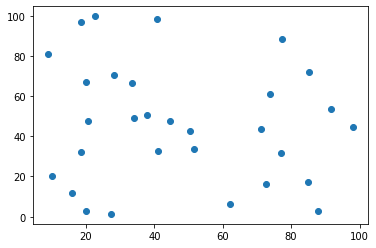

In [79]:
print(list(graph._coordinates.values()), '\n')
x = [coord[0] for coord in graph._coordinates.values()]
y = [coord[1] for coord in graph._coordinates.values()]

# print(x)

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


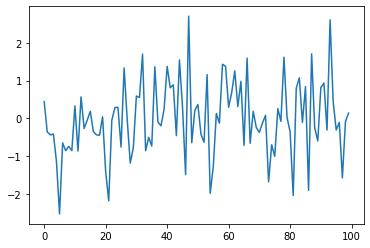

In [140]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
    

<IPython.core.display.Javascript object>


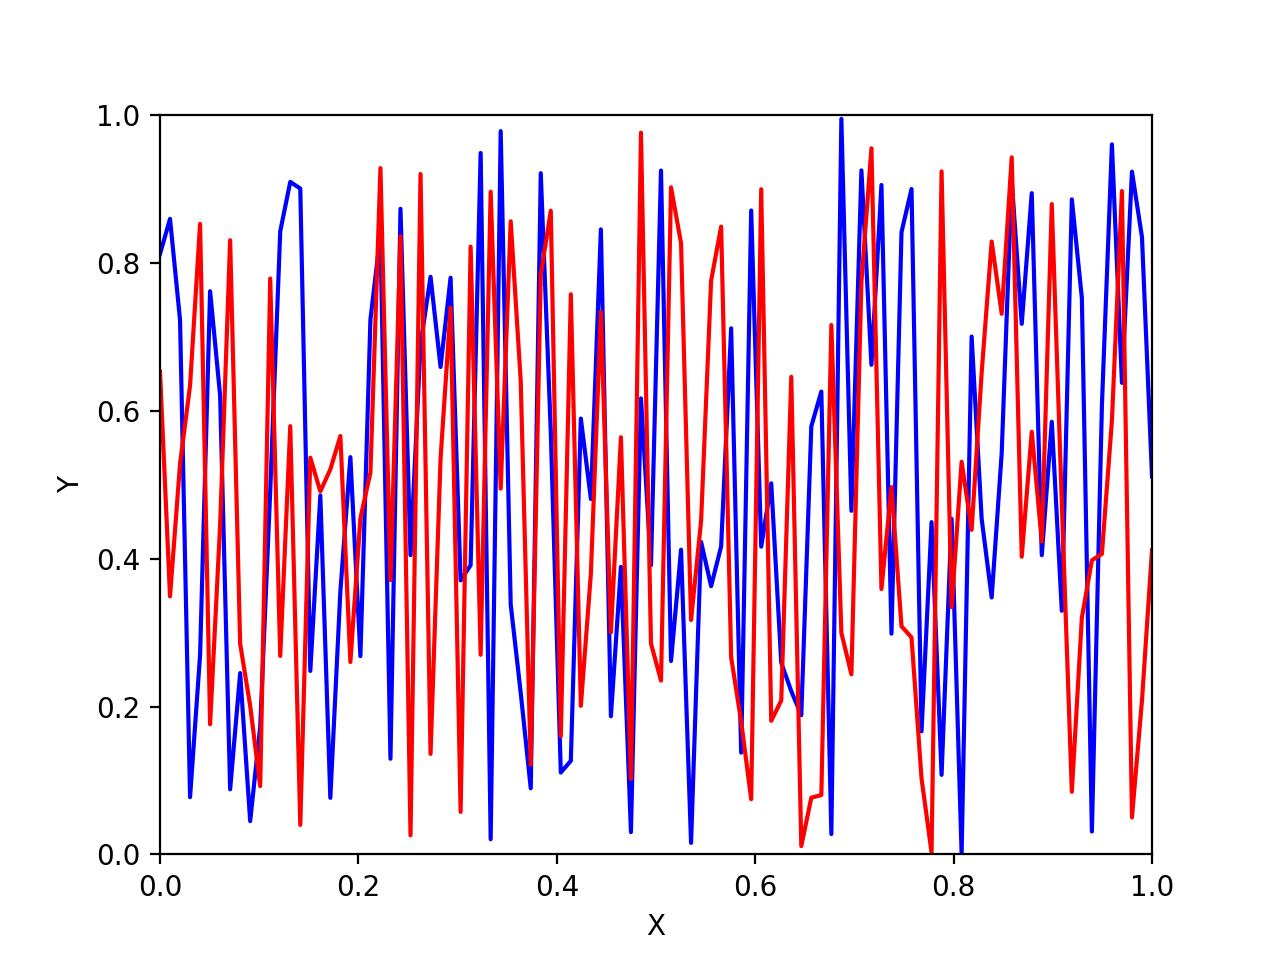

In [143]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

start = 1
goal = 11

# Visualization
# Instantiate a graph
G = nx.Graph()

# Add all edges
for k,v in graph.get_edges().items():
        n1,n2 = k.split('-')
        G.add_edge(int(n1), int(n2), weight = round(v, 2))
               
# Get position layout
pos = nx.shell_layout(G)
# Get weight for each eadge 
labels = nx.get_edge_attributes(G,'weight')
# Drow weights to each edge
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
  
# Find shortest path
shortest_path_vertices = graph.find_shortest_path_dfs(start, goal)[0]

# Get vertices that are not in shortest path
rest_vertices = [vertex for vertex in string_value if vertex  not in shortest_path_vertices]

# Draw Vertices
options = {"node_size": 500, "alpha": 0.5}
nx.draw_networkx_nodes(G, pos, nodelist=rest_vertices, node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_vertices, node_color="b", **options)

# Get a list of edegs ib the shortest path
shortest_path_edges = graph.get_shortest_path_edges(1,11, 'dfs')

# Get a list of edges that are not in a shortest path
rest_edges = graph.exclude_edges(graph.get_shortest_path_edges(1,11, 'dfs'))

# Draw in red edges that are not in shortest path
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=rest_edges,
    width=0.5,
    alpha=0.5,
    edge_color="r",
)

# Draw in blue edges that are in shortest path
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=shortest_path_edges,
    width=2,
    alpha=0.5,
    edge_color="b",
)

plt.axis("off")
# Draw lables in the node
nx.draw_networkx_labels(G,pos, font_size=10)

# nx.draw_shell(G) 
plt.savefig("project_2_graph2.png")
plt.title('Depth-First Search Algorithm')
plt.show()

    
    

In [154]:
print(test[0])

[[5, 14, 26, 5], [5, 14, 2, 26, 5], [5, 14, 2, 12, 26, 5], [5, 14, 2, 12, 18, 26, 5], [5, 14, 2, 11, 12, 18, 26, 5], [5, 14, 2, 16, 11, 12, 18, 26, 5], [5, 14, 2, 16, 10, 11, 12, 18, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 4, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 29, 4, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 29, 13, 4, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 29, 25, 13, 4, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 29, 6, 25, 13, 4, 26, 5], [5, 14, 2, 16, 10, 8, 11, 12, 18, 29, 20, 6, 25, 13, 4, 26, 5], [5, 9, 14, 2, 16, 10, 8, 11, 12, 18, 29, 20, 6, 25, 13, 4, 26, 5], [5, 9, 27, 14, 2, 16, 10, 8, 11, 12, 18, 29, 20, 6, 25, 13, 4, 26, 5], [5, 9, 27, 22, 14, 2, 16, 10, 8, 11, 12, 18, 29, 20, 6, 25, 13, 4, 26, 5], [5, 9, 27, 22, 14, 2, 16, 17, 10, 8, 11, 12, 18, 29, 20, 6, 25, 13, 4, 26, 5], [5, 9, 27, 22, 14, 2, 16, 17, 7, 10, 8, 11, 12, 18, 29, 20, 6, 25, 13, 4, 26, 5], [5, 9, 27, 22, 14, 2, 16, 17, 7, 30, 10, 8, 11, 12, 18, 29, 20, 6

<IPython.core.display.Javascript object>


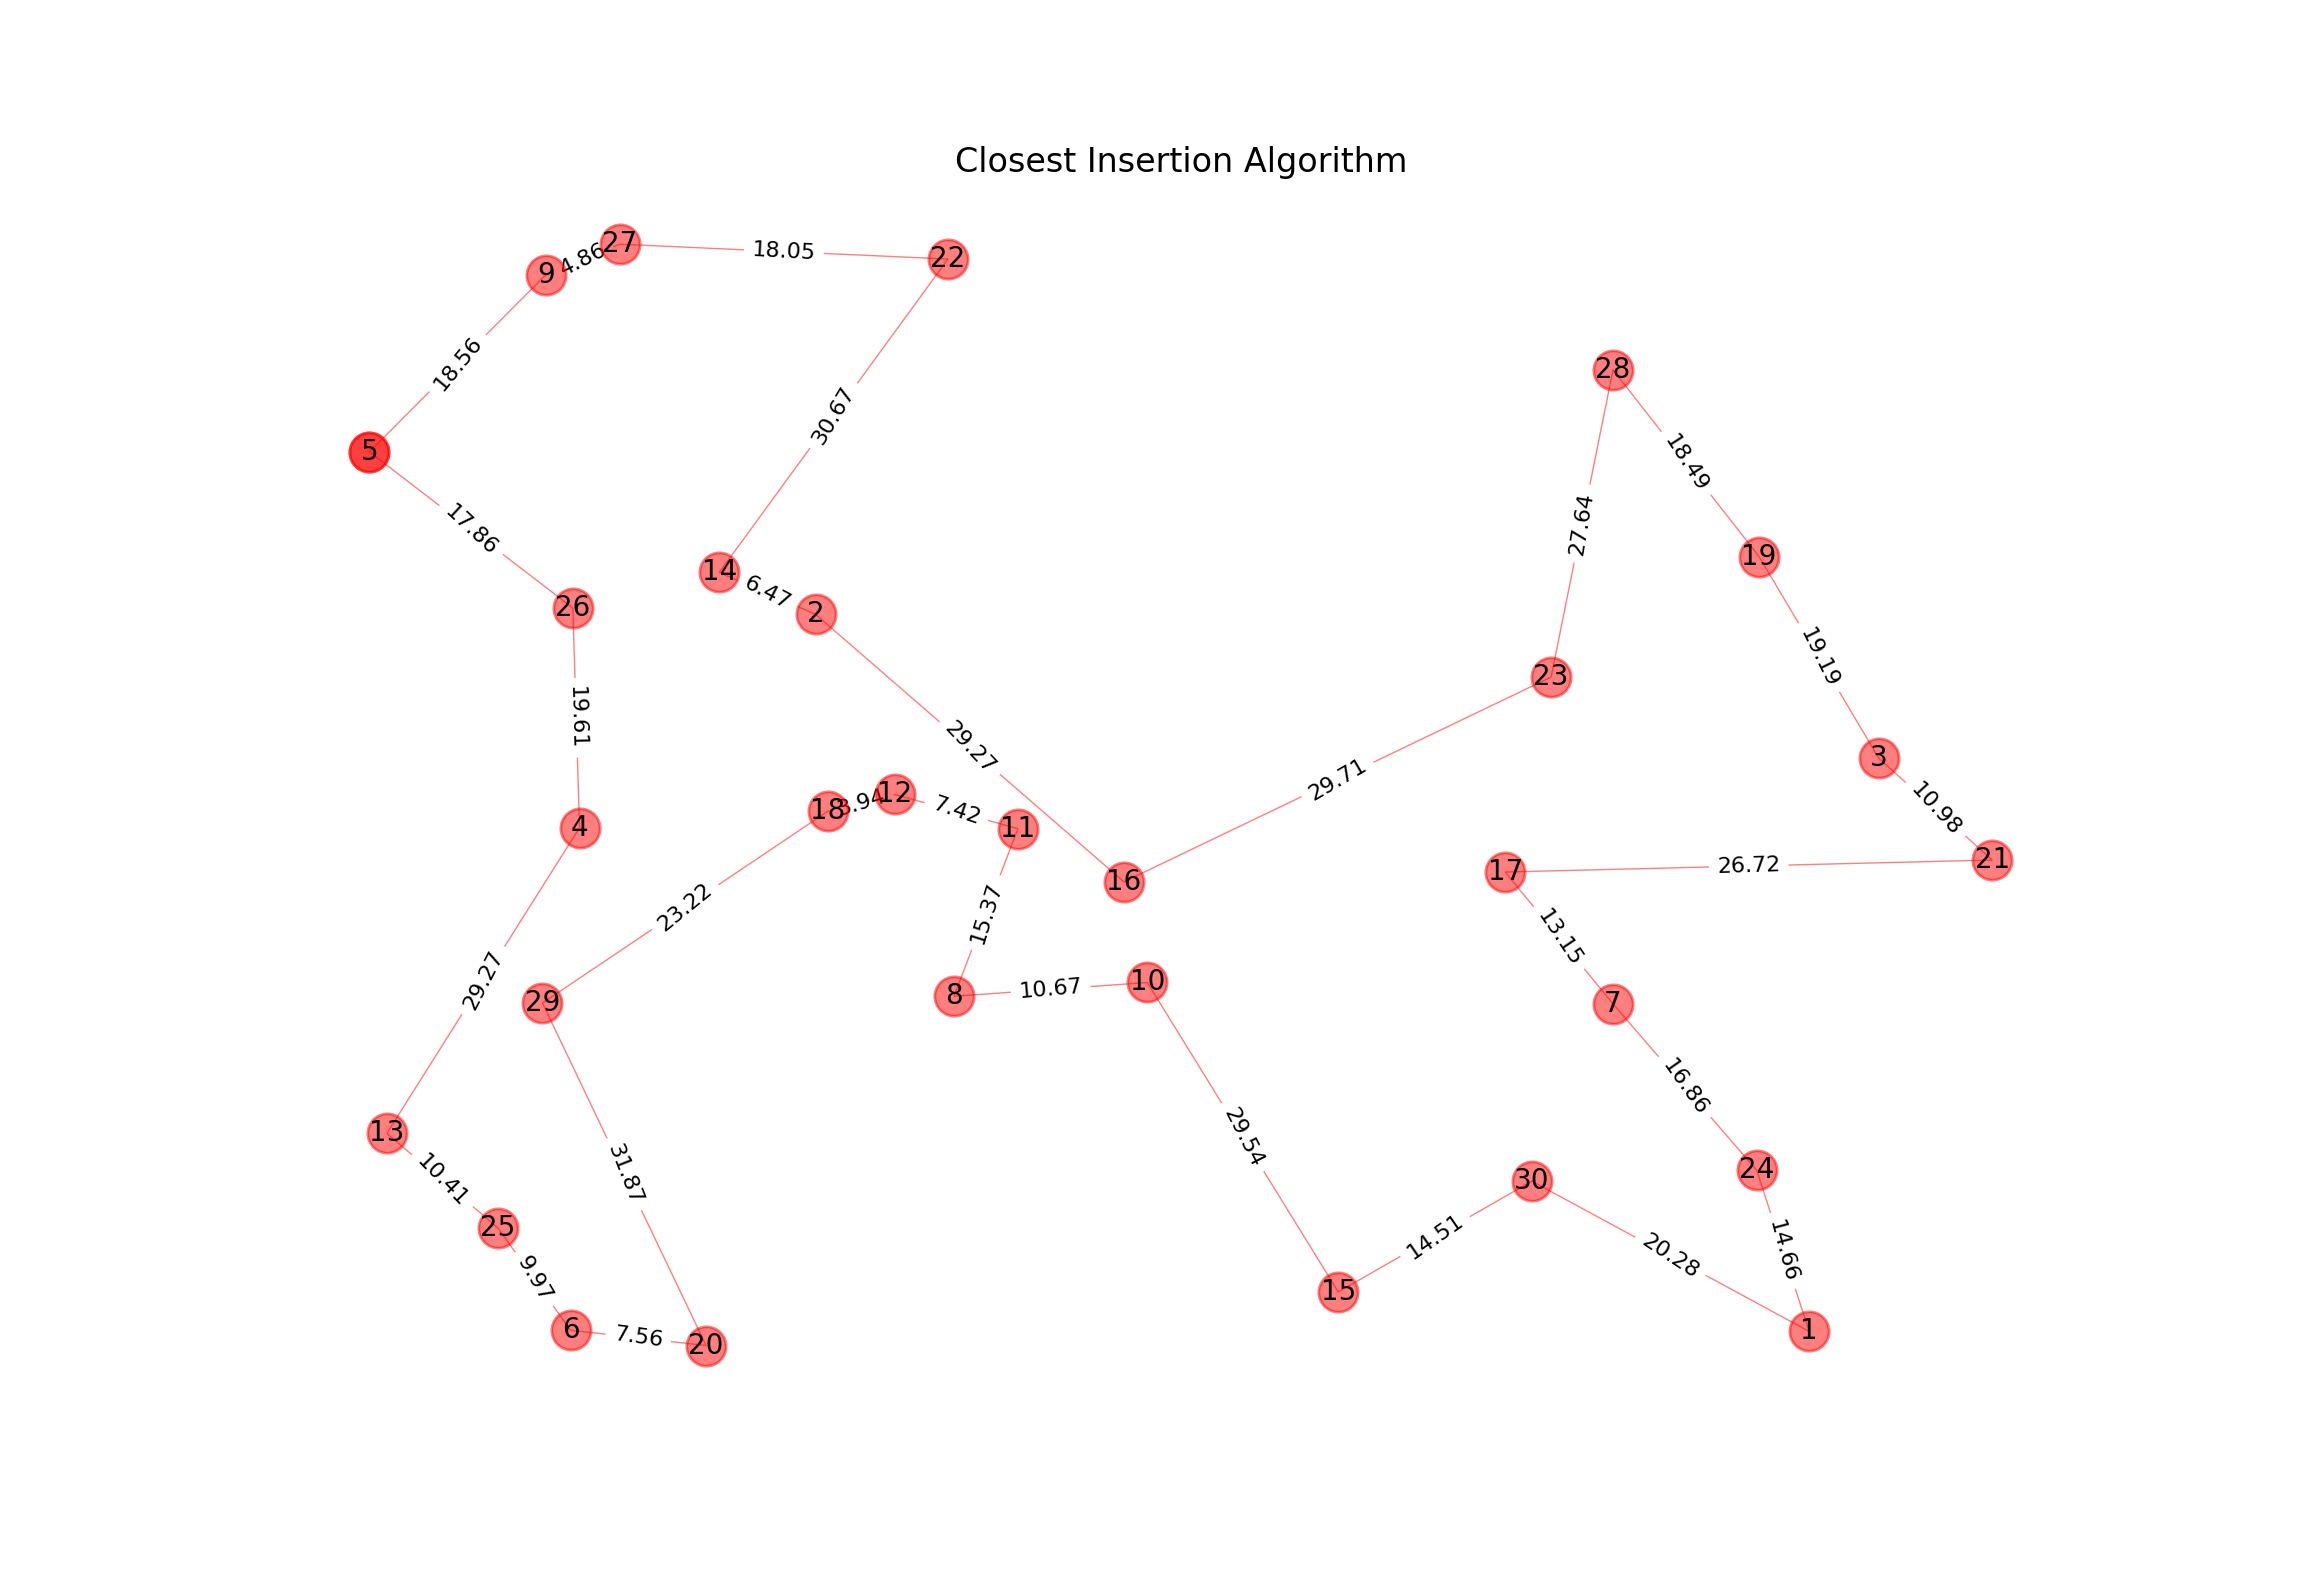

In [213]:
%matplotlib notebook

import matplotlib.pyplot as plt
import time

def draw_closest_insert(tours, coordinates): 
#     G = nx.Graph()
#         tours = test[0][i]
#         coordinates = test[1][i]
    # pos = nx.shell_layout(G)

    # # Drow weights to each edge
    # nx.draw_networkx_edge_labels(G, pos, font_size=8)

    # print(tours)
    # print(coordinates)

    for i in range(len(tours)-1):
        G.add_edge(tours[i], tours[i+1], weight = graph._distances[tours[i]][tours[i+1]])

    #     print(tours[i] , tours[i+1])
    #     print(graph._distances[tours[i]][tours[i+1]])
    # print(G.edges())

    # Get position layout
    pos = {c:d for c,d in list(zip(tours, coordinates))[:len(tours)-1]}
    # Get weight for each eadge 
    labels = nx.get_edge_attributes(G,'weight')
    # Drow weights to each edge
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    # Draw Vertices
    options = {"node_size": 200, "alpha": 0.5}
    nx.draw_networkx_nodes(G, pos, nodelist=tours, node_color="r", **options)
    # Draw in red edges that are not in shortest path
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=G.edges(),
        width=0.5,
        alpha=0.5,
        edge_color="r",
    )

    plt.axis("off")
    # Draw lables in the node
    nx.draw_networkx_labels(G,pos, font_size=10)

    plt.title('Closest Insertion Algorithm')
#     plt.show()

G = nx.Graph()
        
# for i in range(len(test[0])-1):
#     draw_closest_insert(test[0][i], test[1][i])
#     time.sleep(1)

draw_closest_insert(test[0][27], test[1][27])